In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly_express as px
import math

## Initial Data Info

In [2]:
wta2016df= pd.read_csv("../data/orig/wta_matches_2016(1).csv")
wta2016df.shape

(2900, 49)

In [3]:
wta2016df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2016-1049,Auckland,Hard,32,I,20160104,300,201585,5,NaN,...,2.0,6.0,2.0,59.0,35.0,26.0,11.0,10.0,3.0,6.0
1,2016-1049,Auckland,Hard,32,I,20160104,299,201504,NaN,NaN,...,1.0,0.0,0.0,44.0,27.0,19.0,5.0,9.0,2.0,6.0
2,2016-1049,Auckland,Hard,32,I,20160104,298,201585,5,NaN,...,7.0,1.0,3.0,68.0,43.0,26.0,12.0,10.0,4.0,7.0
3,2016-1049,Auckland,Hard,32,I,20160104,297,201504,NaN,NaN,...,0.0,4.0,2.0,91.0,61.0,44.0,15.0,15.0,2.0,5.0
4,2016-1049,Auckland,Hard,32,I,20160104,296,201481,NaN,Q,...,17.0,5.0,8.0,98.0,60.0,32.0,18.0,15.0,7.0,14.0


## Identifying Null height values to manually input heights from the WTA database

In [4]:
wta2016df[wta2016df['winner_ht'].isnull()]['winner_name'].count()

1247

In [5]:
wta2016df[wta2016df['loser_ht'].isnull()]['loser_name'].count()

1549

In [6]:
wta2016df['winner_ht'].value_counts()

170.0    153
174.0    152
180.0    126
177.0    107
168.0    104
182.0    102
173.0    101
178.0     91
184.0     76
175.0     69
183.0     61
164.0     60
161.0     56
185.0     55
165.0     48
162.0     39
176.0     39
179.0     35
172.0     32
163.0     31
166.0     30
181.0     29
159.0     25
157.0     16
169.0     13
171.0      3
Name: winner_ht, dtype: int64

In [7]:
wta2016df[wta2016df['winner_ht'].isnull()]['winner_name'].value_counts()

Johanna Konta                   46
Monica Puig                     42
Caroline Garcia                 41
Darya Kasatkina                 33
Timea Bacsinszky                32
Shuai Zhang                     30
Laura Siegemund                 29
Eugenie Bouchard                29
Daria Gavrilova                 29
Yulia Putintseva                28
Alison Riske                    26
Ana Konjuh                      22
Anastasija Sevastova            21
Naomi Osaka                     20
Belinda Bencic                  20
Viktorija Golubic               20
Jelena Ostapenko                19
Anna Lena Friedsam              19
Nao Hibino                      19
Danka Kovinic                   18
Katerina Siniakova              17
Kurumi Nara                     16
Madison Brengle                 16
Evgeniya Rodina                 16
Kristyna Pliskova               15
Mirjana Lucic                   14
Denisa Allertova                14
Saisai Zheng                    13
Anett Kontaveit     

__I can now go into the original data set and add the appopriate heights for each of these players__

## Working with the New Data Set after Inputting heights

In [8]:
wta2016df= pd.read_csv("../data/clean/wta_matches_2016 (1).csv")
wta2016df.shape

(2900, 49)

In [9]:
wta2016df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

## Inputting a Number of Sets Column into the New Data Set

In [10]:
wta2016df['num_sets']=wta2016df['score'].str.count('-')

In [11]:
wta2016df.head(5)['score']

0           7-5 6-2
1           6-4 6-2
2        6-2 7-6(3)
3    6-7(3) 6-2 6-4
4    6-4 6-7(3) 6-3
Name: score, dtype: object

In [12]:
wta2016df.head(5)['num_sets']

0    2
1    2
2    2
3    3
4    3
Name: num_sets, dtype: int64

## Confirming that the New Data Has Less Null Heights

In [13]:
wta2016df[wta2016df['loser_ht'].isnull()]['loser_name'].count()

314

314 < 1549 so the loser nulls have decreased

In [14]:
wta2016df[wta2016df['winner_ht'].isnull()]['winner_name'].count()

118

118 < 1247 so the winner nulls have decreased

## Saving the New Data Set

In [15]:
wta2016df.to_csv('../data/clean/wta_matches_2016.csv', index=False)

## Initial Histograms comparing Winners v. Losers distribution of key variables

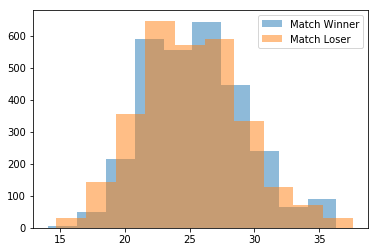

In [16]:
plt.hist(wta2016df['winner_age'], alpha=0.5, label='Match Winner')
plt.hist(wta2016df['loser_age'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

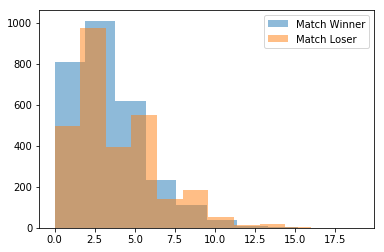

In [17]:
plt.hist(wta2016df['w_df'], alpha=0.5, label='Match Winner')
plt.hist(wta2016df['l_df'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

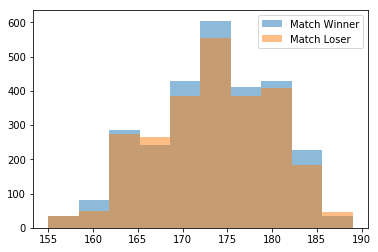

In [18]:
plt.hist(wta2016df['winner_ht'], alpha=0.5, label='Match Winner')
plt.hist(wta2016df['loser_ht'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

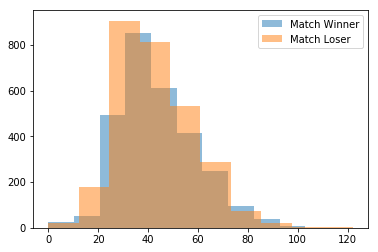

In [19]:
plt.hist(wta2016df['w_1stIn'], alpha=0.5, label='Match Winner')
plt.hist(wta2016df['l_1stIn'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

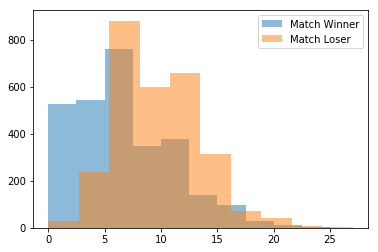

In [20]:
plt.hist(wta2016df['w_bpFaced'], alpha=0.5, label='Match Winner')
plt.hist(wta2016df['l_bpFaced'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

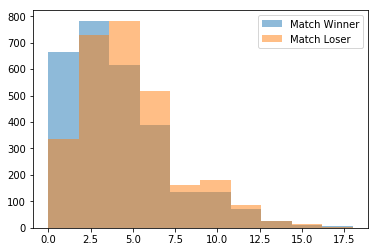

In [21]:
plt.hist(wta2016df['w_bpSaved'], alpha=0.5, label='Match Winner')
plt.hist(wta2016df['l_bpSaved'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

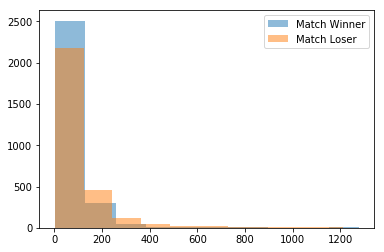

In [22]:
plt.hist(wta2016df['winner_rank'], alpha=0.5, label='Match Winner')
plt.hist(wta2016df['loser_rank'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

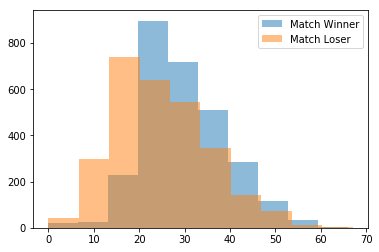

In [23]:
plt.hist(wta2016df['w_1stWon'], alpha=0.5, label='Match Winner')
plt.hist(wta2016df['l_1stWon'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

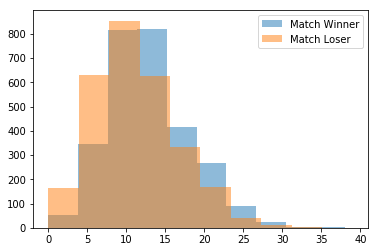

In [24]:
plt.hist(wta2016df['w_2ndWon'], alpha=0.5, label='Match Winner')
plt.hist(wta2016df['l_2ndWon'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()